In [ ]:
!pip install kaggle
!pip install gdown
!pip install ultralytics
!pip install pyyaml

In [ ]:
!gdown 1kIzt9delhorrSpJKeR-CUUX4BEqPCS55 -O kaggle.json
!gdown 1fPKIp6rRbxBoYXceJxCPZIJHuDB0-jHx -O sh17.yaml
!gdown 1rww4-kJau7RdKEIHy_I2diCY4pOFeDT5 -O con.jpg

Downloading...
From: https://drive.google.com/uc?id=1kIzt9delhorrSpJKeR-CUUX4BEqPCS55
To: /content/kaggle.json
100% 67.0/67.0 [00:00<00:00, 380kB/s]
Downloading...
From: https://drive.google.com/uc?id=1fPKIp6rRbxBoYXceJxCPZIJHuDB0-jHx
To: /content/sh17.yaml
100% 566/566 [00:00<00:00, 2.28MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rww4-kJau7RdKEIHy_I2diCY4pOFeDT5
To: /content/con.jpg
100% 58.6k/58.6k [00:00<00:00, 94.5MB/s]


In [ ]:
!mkdir kaggle
!mv kaggle.json kaggle/
!chmod 600 /content/kaggle/kaggle.json

mkdir: cannot create directory ‘kaggle’: File exists


In [ ]:
import kagglehub
import numpy as np
import pandas as pd
import os
import yaml

In [ ]:
dataset_path = kagglehub.dataset_download("mugheesahmad/sh17-dataset-for-ppe-detection")
print("Path to dataset files:", dataset_path)

Using Colab cache for faster access to the 'sh17-dataset-for-ppe-detection' dataset.
Path to dataset files: /kaggle/input/sh17-dataset-for-ppe-detection


In [ ]:
os.listdir(dataset_path)

['labels',
 'train_files.txt',
 'images',
 'meta-data',
 'val_files.txt',
 'voc_labels']

In [ ]:
def update(file_path: str, root: str):
    with open(file_path, 'r') as file:
        paths = file.readlines()

    updated_paths = list[str]()
    for path in paths:
        path = path.strip()
        updated_paths.append(os.path.join(root, path) + '\n')

    new_file_path = "/content//updated_" + os.path.basename(file_path)

    with open(new_file_path, 'w') as file:
        file.writelines(updated_paths)

    print(f"Updated file created successfully at {new_file_path}")

In [ ]:
root = os.path.join(dataset_path, "images")
update(os.path.join(dataset_path, "train_files.txt"), root=root)
update(os.path.join(dataset_path, "val_files.txt"), root=root)

Updated file created successfully at /content//updated_train_files.txt
Updated file created successfully at /content//updated_val_files.txt


In [ ]:
yaml_path = "/content/sh17.yaml"

with open(yaml_path, 'r') as file:
    data = yaml.safe_load(file)

data['path'] = dataset_path
data['train'] = '/content/updated_train_files.txt'
data['val'] = '/content/updated_val_files.txt'
with open(yaml_path, 'w') as file:
    yaml.dump(data, file, indent=4)

print(f"Successfully updated {yaml_path}")

Successfully updated /content/sh17.yaml


In [ ]:
from ultralytics import YOLO
model = YOLO("best1.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model.train(data= '/content/sh17.yaml', batch=32, epochs=10, imgsz=480)

Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/sh17.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=480, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=best1.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrai

KeyboardInterrupt: 

In [ ]:
!zip -r /content/runs/detect/train.zip /content/runs/detect/train


image 1/1 /content/con.jpg: 288x480 3 persons, 1 ear, 4 faces, 3 helmets, 3 handss, 3 heads, 5 safety-vests, 55.6ms
Speed: 1.4ms preprocess, 55.6ms inference, 8.6ms postprocess per image at shape (1, 3, 288, 480)


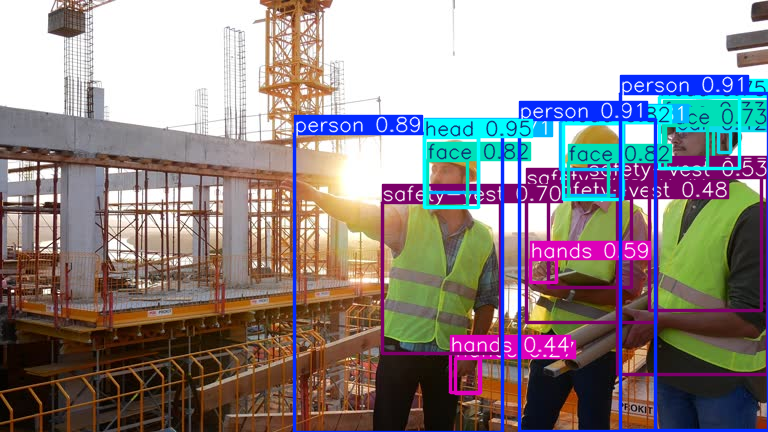

In [ ]:
results = model('con.jpg')
results[0].show()